In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("/content/mcdonalds.csv")

In [ ]:
df.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male


In [ ]:
df.shape

(1453, 15)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   yummy           1453 non-null   object
 1   convenient      1453 non-null   object
 2   spicy           1453 non-null   object
 3   fattening       1453 non-null   object
 4   greasy          1453 non-null   object
 5   fast            1453 non-null   object
 6   cheap           1453 non-null   object
 7   tasty           1453 non-null   object
 8   expensive       1453 non-null   object
 9   healthy         1453 non-null   object
 10  disgusting      1453 non-null   object
 11  Like            1453 non-null   object
 12  Age             1453 non-null   int64 
 13  VisitFrequency  1453 non-null   object
 14  Gender          1453 non-null   object
dtypes: int64(1), object(14)
memory usage: 170.4+ KB


In [ ]:
import pandas as pd
import numpy as np

# Assuming 'mcdonalds' is a pandas DataFrame
MD_x = df.iloc[:, :11].map(lambda x: 1 if x == "Yes" else 0)

# Calculate column means and round to 2 decimal places
column_means = MD_x.mean().round(2)

print(column_means)


yummy         0.55
convenient    0.91
spicy         0.09
fattening     0.87
greasy        0.53
fast          0.90
cheap         0.60
tasty         0.64
expensive     0.36
healthy       0.20
disgusting    0.24
dtype: float64


In [ ]:
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np

# Perform PCA
pca = PCA()
MD_pca = pca.fit(MD_x)

# Standard deviations of the principal components
std_devs = np.sqrt(pca.explained_variance_)

# Explained variance ratio and cumulative variance
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = explained_variance_ratio.cumsum()

# Create a summary DataFrame
summary_df = pd.DataFrame({
    "Standard Deviation": std_devs,
    "Explained Variance Ratio": explained_variance_ratio,
    "Cumulative Variance": cumulative_variance
})

print(summary_df)


    Standard Deviation  Explained Variance Ratio  Cumulative Variance
0             0.757050                  0.299447             0.299447
1             0.607456                  0.192797             0.492244
2             0.504619                  0.133045             0.625290
3             0.398799                  0.083096             0.708386
4             0.337405                  0.059481             0.767866
5             0.310275                  0.050300             0.818166
6             0.289697                  0.043849             0.862015
7             0.275122                  0.039548             0.901563
8             0.265251                  0.036761             0.938323
9             0.248842                  0.032353             0.970677
10            0.236903                  0.029323             1.000000


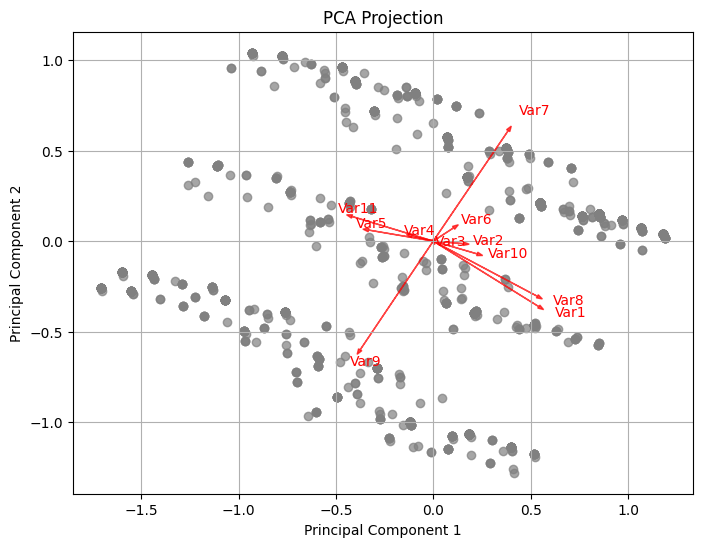

In [ ]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Assuming MD_pca is the PCA object and MD_x is the data
pca_components = pca.transform(MD_x)  # Project data onto principal components

# Scatter plot of the first two principal components
plt.figure(figsize=(8, 6))
plt.scatter(pca_components[:, 0], pca_components[:, 1], color='grey', alpha=0.7)
plt.title("PCA Projection")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.grid(True)

# Annotate axes projections (like projAxes)
for i, vector in enumerate(pca.components_.T):
    plt.arrow(0, 0, vector[0]*max(pca_components[:, 0]), vector[1]*max(pca_components[:, 1]),
              color='red', alpha=0.7, head_width=0.02, length_includes_head=True)
    plt.text(vector[0]*max(pca_components[:, 0]) * 1.1,
             vector[1]*max(pca_components[:, 1]) * 1.1,
             f"Var{i+1}", color='red')

plt.show()


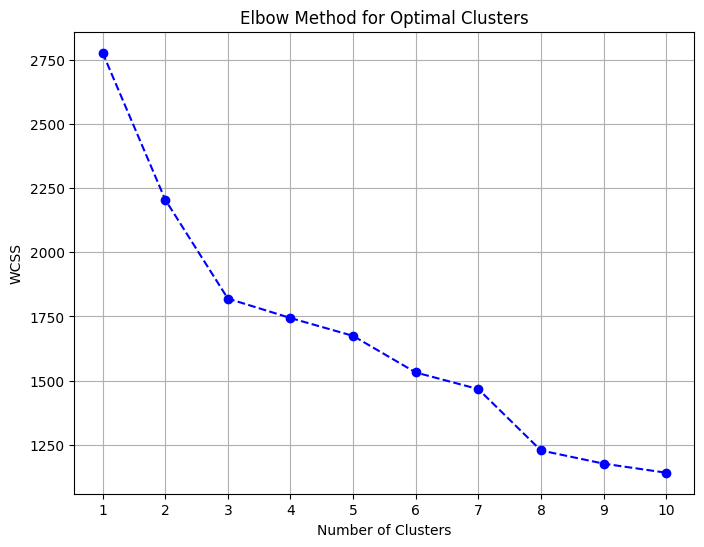

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Compute WCSS for different numbers of clusters
wcss = []
max_clusters = 10  # Adjust as needed
for i in range(1, max_clusters + 1):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(pca_components)
    wcss.append(kmeans.inertia_)  # Inertia is the WCSS

# Plot WCSS (Elbow Method)
plt.figure(figsize=(8, 6))
plt.plot(range(1, max_clusters + 1), wcss, marker='o', linestyle='--', color='b')
plt.title("Elbow Method for Optimal Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.xticks(range(1, max_clusters + 1))
plt.grid(True)
plt.show()


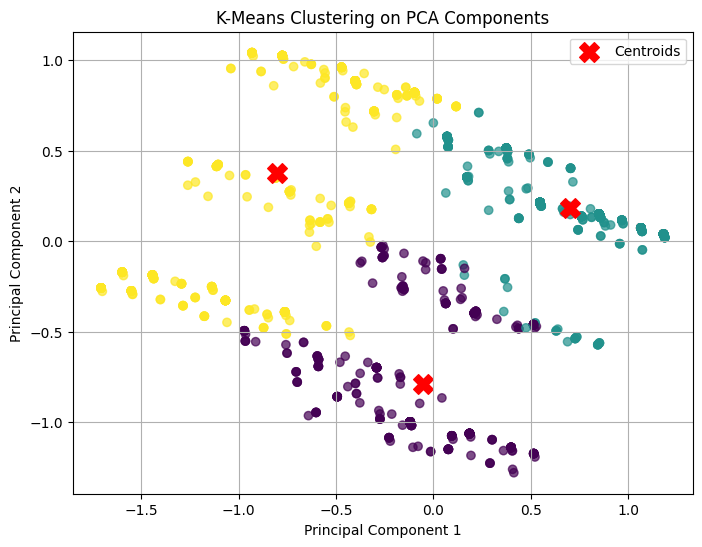

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Perform k-means clustering on the PCA-transformed data
kmeans = KMeans(n_clusters=3, random_state=42)  # Change n_clusters as needed
kmeans_labels = kmeans.fit_predict(pca_components)

# Scatter plot of the first two principal components with k-means cluster labels
plt.figure(figsize=(8, 6))
plt.scatter(pca_components[:, 0], pca_components[:, 1], c=kmeans_labels, cmap='viridis', alpha=0.7)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color='red', marker='X', s=200, label='Centroids')
plt.title("K-Means Clustering on PCA Components")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.grid(True)
plt.show()
